In [79]:
install.packages("functional")


The downloaded binary packages are in
	/var/folders/0r/q8rhvrtd5j7gmlxf640sfvx80000gq/T//RtmpHXnCfR/downloaded_packages


In [80]:
# library(functional)
# .libPaths()
library(functional)

In [30]:
# curve(dbeta(x, 0.01, 10), from=0, to=1)

## Quantile Loss

Calculate loss based on the quantiles ie; find the ranges of the prediction function.

Using this quantile method we can calculate how the upper range, middle range ( normal predicted line ) and the lower bound of our model predictions. From this we can see the difference in predictions. Or Using the quantile loss we can force the model to get away from `mean` part and look out for the extream cases also.


$ error = y_i - f(x) $

See below plots to get an idea of different quantile ranges applied to get different loss functions, and how they influeance the learning procedure for particular regions gets more stress compared to the other. By default case or the quantile of 50% is the default behaviour of all sides are considered equally.

In [28]:
# install.packages("rstan")
quantile_loss <- function(error, quantile=0.9) {
    return (ifelse(error >= 0, quantile * error, (quantile-1) * error))
}

In [86]:
quantile_10 = Curry(quantile_loss, quantile=0.1)
quantile_50 = Curry(quantile_loss, quantile=0.5)
quantile_90 = Curry(quantile_loss, quantile=0.9)

In [87]:
# plot(cos, -pi,  3*pi)
# curve(cos, xlim = c(-pi, 3*pi), n = 1001, col = "blue", add = TRUE)

# chippy <- function(x) sin(cos(x)*exp(-x/2))
# curve(chippy, -8, 7, n = 2001)
# plot (chippy, -8, -5)

# op <- par()
# curve(x^3 - 3*x, -2, 2)
# curve(x^2 - 2, add = TRUE, col = "violet")

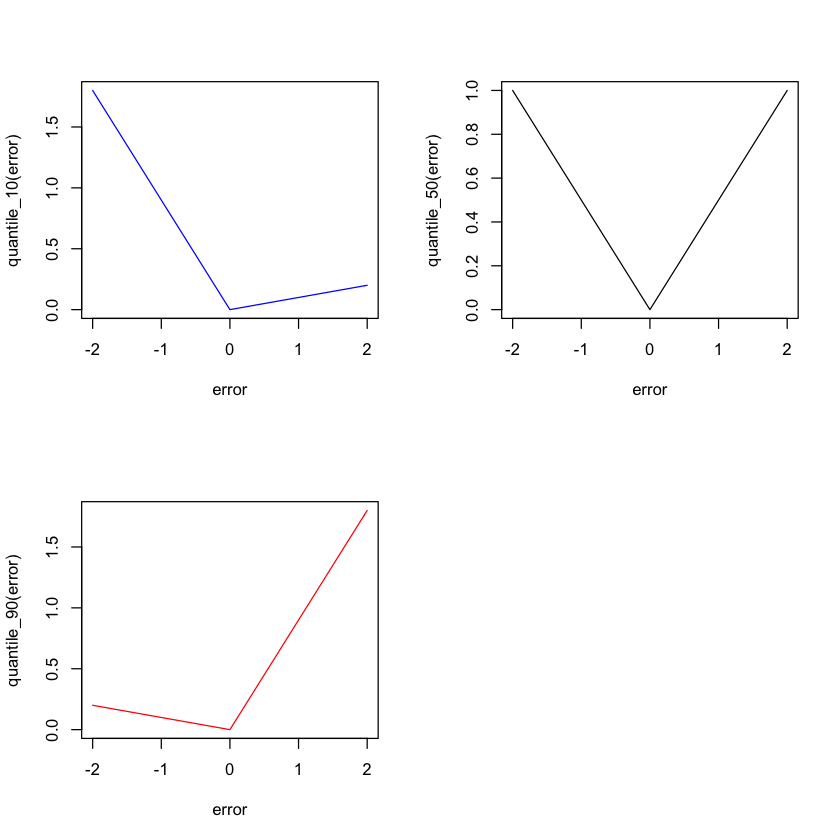

In [99]:
op <- par(mfrow = c(2, 2))
curve(quantile_10, from=-2, to=2, xname = "error", col = "blue")
curve(quantile_50, from=-2, to=2, xname = "error", col = "black")
curve(quantile_90, from=-2, to=2, xname = "error", col = "red")

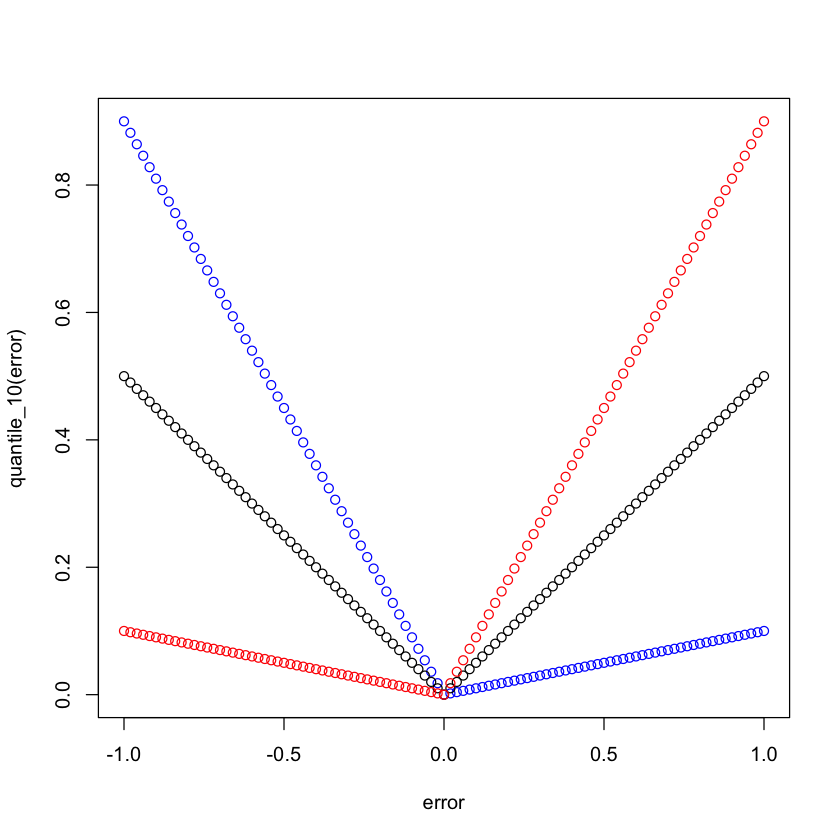

In [117]:
curve(quantile_10, from=-1, to=1, xname = "error", col = "blue", type = "b")
curve(quantile_50, from=-1, to=1, xname = "error", col = "black", add = TRUE, type = "b")
curve(quantile_90, from=-1, to=1, xname = "error", col = "red", add = TRUE, type = "b")